# 1: Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# 2: Reading and understanding dataset

In [317]:
bikesharing_df = pd.read_csv('day.csv')
bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [318]:
# Checking the datatypes of data
# There are no null values in any columns
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [319]:
# Checking more details
bikesharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [320]:
# Checking the column and rows
bikesharing_df.shape

(730, 16)

# 3: Data Cleaning
#### Dropping 'instant' column as its just instant and does not have any value addition for current analysis
#### Dropping 'casual' and registered as we have sum of these in cnt, so our target variable will be cnt
#### Dropping 'dteday' as we already have year wise in another col
#### Dropping 'temp' as we have a atemp which tells us actual feeling of temperature, this will be usefull

In [321]:
bs_df = bikesharing_df.drop(['instant','casual','registered','dteday','temp'], axis =1)

In [322]:
bs_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [323]:
# Convert season, weathersit, weekday, mnth into categorical variables
# convert weathersit into categotical string variables
# yes/no variables
var = ['weathersit']
bs_df[var]= bs_df[var].apply(lambda x: x.map({1:'Clear',2:'Mist', 3:'Light Rain'}))
var1 = ['season']
bs_df[var1]= bs_df[var1].apply(lambda x: x.map({1:'spring',2:'summer', 3:'fall', 4:'winter'}))
var2 = ['mnth']
bs_df[var2]= bs_df[var2].apply(lambda x: x.map({1:'Jan',2:'Feb', 3:'Mar', 4:'April', 5:'May', 6:'June', 7:'july', 8:'Aug', 9:'sep', 10:'oct', 11:'Nov', 12:'Dec'}))
var3 = ['weekday']
bs_df[var3]= bs_df[var3].apply(lambda x: x.map({0:'Sun',1:'Mon', 2:'Tue', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat'}))
bs_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Thur,1,Mist,11.33210,65.2917,23.458911,2114
726,spring,1,Dec,0,Fri,1,Mist,12.75230,59.0000,10.416557,3095
727,spring,1,Dec,0,Sat,0,Mist,12.12000,75.2917,8.333661,1341
728,spring,1,Dec,0,Sun,0,Clear,11.58500,48.3333,23.500518,1796


# 4: EDA
#### Categorical variables vs continous variables

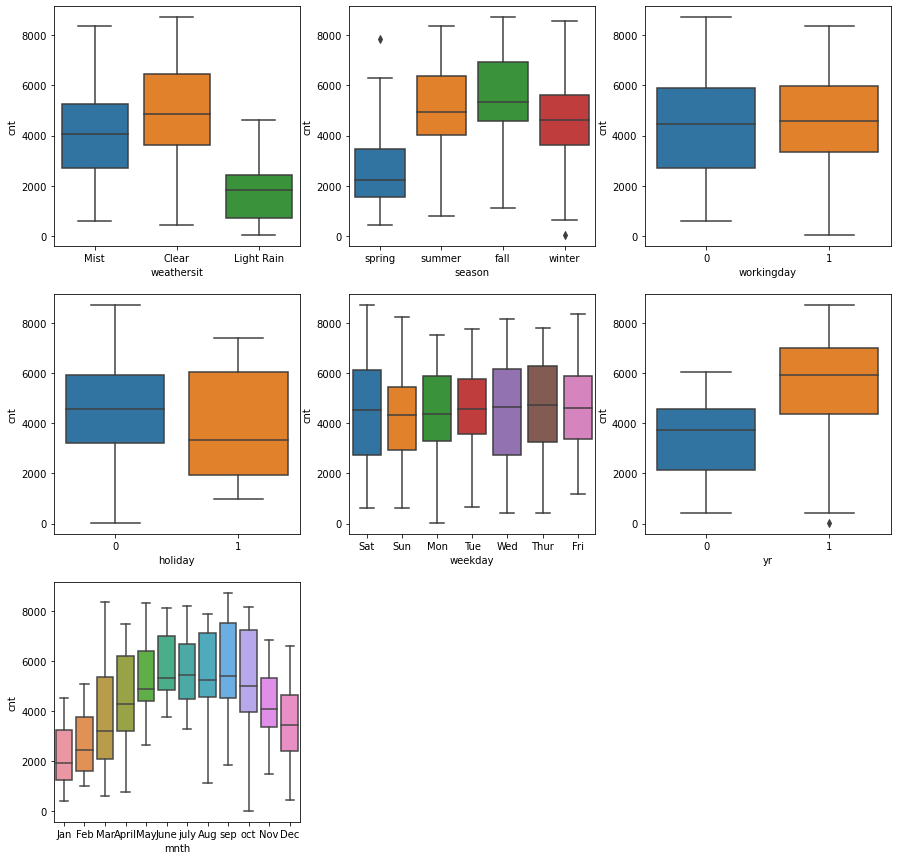

In [324]:
# visualising categorical variables
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='weathersit',y='cnt',data=bs_df)
plt.subplot(3,3,2)
sns.boxplot(x='season',y='cnt',data=bs_df)
plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt',data=bs_df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bs_df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bs_df)
plt.subplot(3,3,6)
sns.boxplot(x='yr',y='cnt',data=bs_df)
plt.subplot(3,3,7)
sns.boxplot(x='mnth',y='cnt',data=bs_df)
plt.show()

### Below are factors when bike demand is high
#### weathersit: there are more counts for bike sharing when climate is clear
#### Season: fall has the highest demand for bikes followed by summer, also there median is close. 
#### year: In 2019 demand is much more than 2018
#### Month: We can see demand has gradually increasing till sep, then falling down, so we can focus on month sep and oct
#### Holiday: There is less demand on holidays
#### Weekday is not giving and clear picture, it seems in all day of week has almost equal no of bike sharing. Only on sat looks more no of bike demands and least is on tuesday

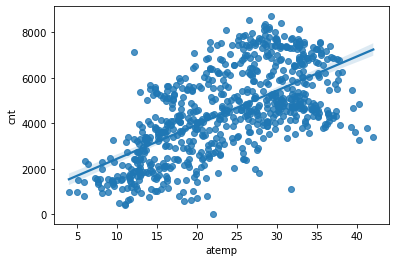

In [325]:
# Continous vs continous variable
sns.regplot(x="atemp",y='cnt',data=bs_df)
plt.show()

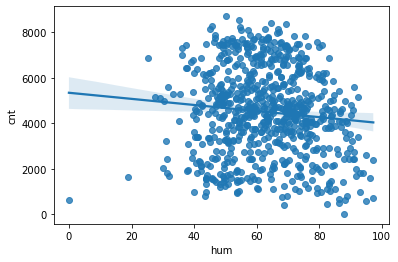

In [200]:
sns.regplot(x="hum",y='cnt',data=bs_df)
plt.show()

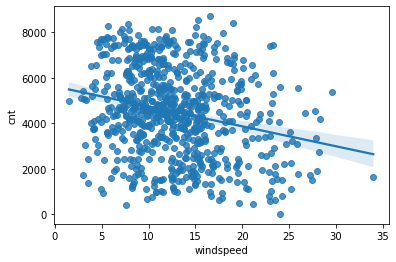

In [160]:
sns.regplot(x="windspeed",y='cnt',data=bs_df)
plt.show()

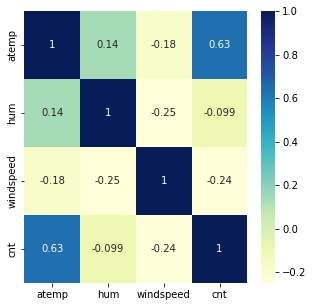

In [326]:
# heatmap
plt.figure(figsize=(5,5))
sns.heatmap(bs_df[['atemp','hum','windspeed','cnt']].corr(),annot=True,cmap='YlGnBu')
plt.show()

#### Inference: There is positive correlation between cnt and atemp, when temp is increasing demand for bikes increase

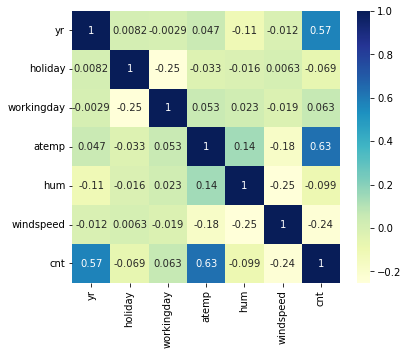

In [327]:
plt.figure(figsize=(6,5))
sns.heatmap(bs_df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [328]:
# Pivot table
# categorical vs catagorical variables
bs_df.pivot_table(index='holiday',columns='mnth',values='cnt')

mnth,April,Aug,Dec,Feb,Jan,June,Mar,May,Nov,july,oct,sep
holiday,,,,,,,,,,,,
0,4475.827586,5664.419355,3478.433333,2690.407407,2198.033898,5772.366667,3692.258065,5359.083333,4308.464286,5525.033333,5195.95,5803.551724
1,4748.000000,NaN,1165.000000,2118.000000,1749.666667,NaN,NaN,5070.500000,3389.250000,6723.000000,5297.50,4692.500000


#### From above pivot table we can see that data for holiday is missing for month of Aug, June, Mar.
#### Also in month of Dec, jan, Feb that is in winters, demand for bikes is least during holidays

# 5: Data preprocessing

#### Create dummies for all categorical variables

In [329]:
# dropping redundant dummy variable
# Not dropping weathersit as Mist seems imp variable for analysis
# it seems its dropping april mnth which is imp for analysis hence not dropping 1st variables in season. 
#bikesharing_df = pd.get_dummies(data=bs_df,columns=[],drop_first=True)
bikesharing_df = pd.get_dummies(data=bs_df,columns=['weathersit','mnth','season','weekday'])

In [330]:
bikesharing_df.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'weathersit_Clear', 'weathersit_Light Rain', 'weathersit_Mist',
       'mnth_April', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_july',
       'mnth_oct', 'mnth_sep', 'season_fall', 'season_spring', 'season_summer',
       'season_winter', 'weekday_Fri', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thur', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [331]:
bikesharing_df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,weathersit_Clear,weathersit_Light Rain,weathersit_Mist,...,season_spring,season_summer,season_winter,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,1,0,0,0,0,0,0,0,0,1


## 5.1 Test-Train split

In [332]:
#train test split
df_train, df_test = train_test_split(bikesharing_df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 33)
(220, 33)


## 5.2 Rescaling the feature

In [333]:
# Scaling continuous variables atemp, hum, windspeed, 

# instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars = ['atemp','hum','windspeed']

# fit on data
#fit(): learns xmin and xmax
#transforms():x-xmin/xmax-xmin
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,weathersit_Clear,weathersit_Light Rain,weathersit_Mist,...,season_spring,season_summer,season_winter,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed
576,1,0,1,0.766351,0.725633,0.264686,7216,1,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.438975,0.640189,0.255342,4066,0,0,1,...,1,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1796,1,0,0,...,1,0,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,4220,0,0,1,...,0,1,0,0,0,1,0,0,0,0
111,0,0,1,0.318819,0.751824,0.380981,1683,0,0,1,...,0,1,0,1,0,0,0,0,0,0


## 5.3 Training the model

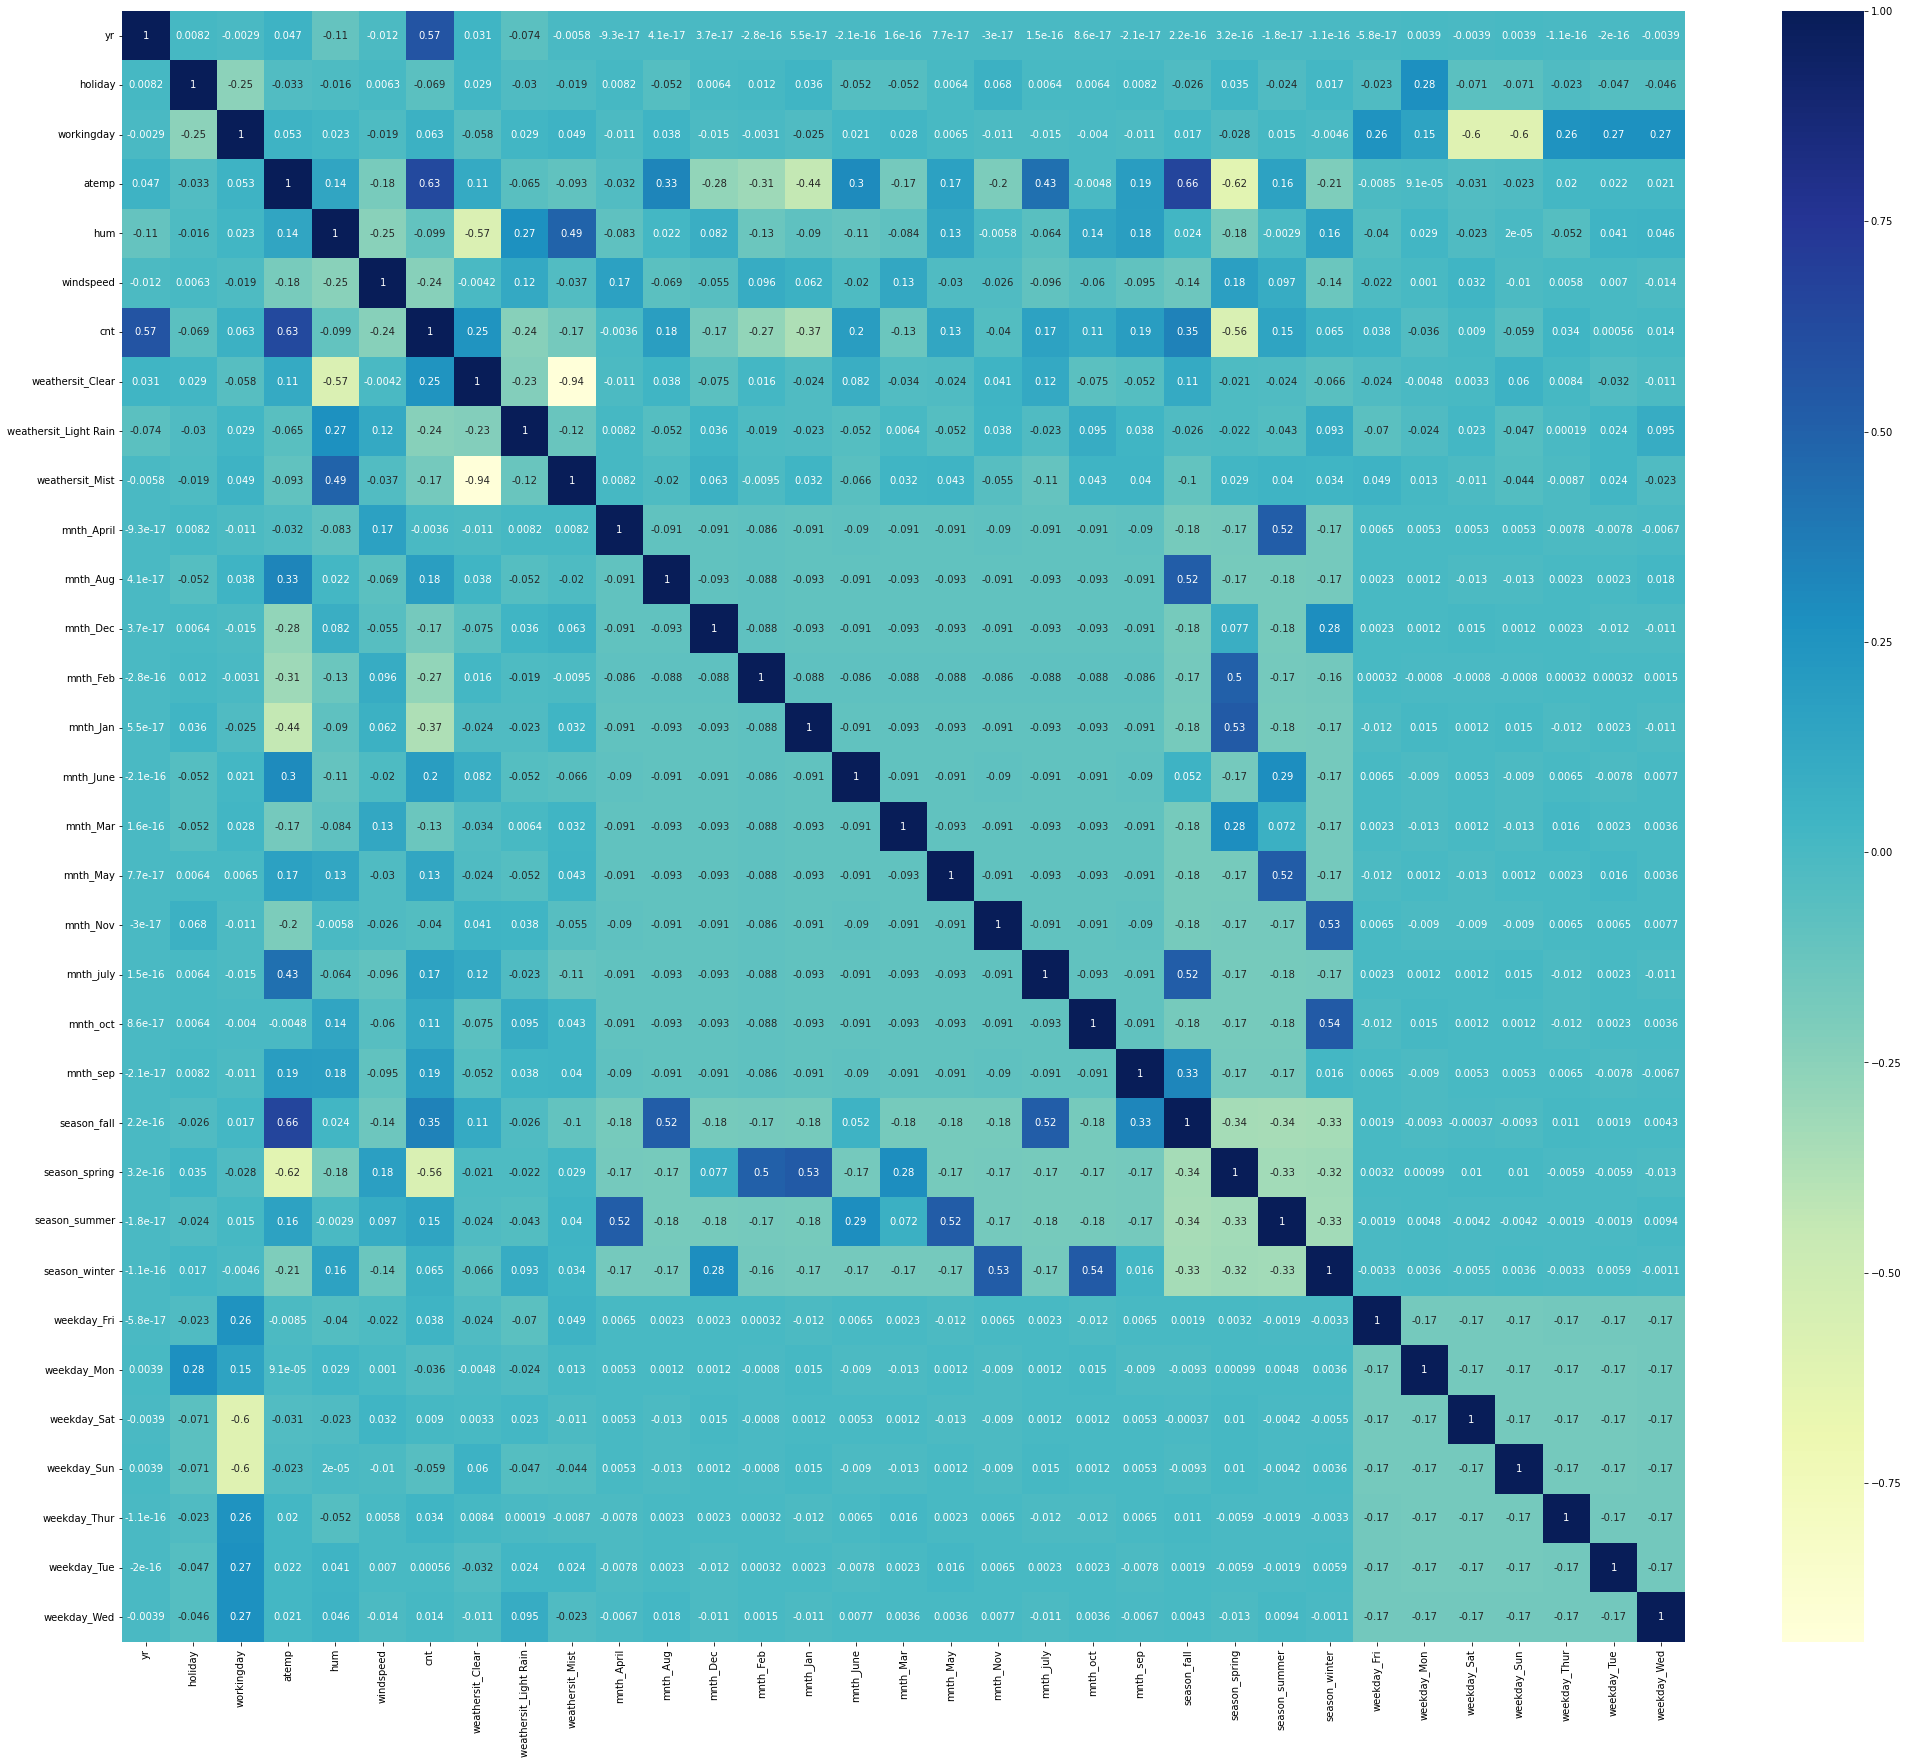

In [334]:
plt.figure(figsize=(35,30))
sns.heatmap(bikesharing_df.corr(),annot=True,cmap='YlGnBu')
plt.show()

#### From above there is high correlation between 
- cnt and yr
- cnt and atemp
- cnt and weathersit_clear
- cnt and month_aug
- cnt and season_fall
- cnt and mnth_sep

In [335]:
# X_train, y_train
X_train = df_train
y_train = df_train.pop('cnt')

In [336]:
# build the models with all the variables
# add a constant
X_train_sm = X_train[['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'weathersit_Clear', 'weathersit_Light Rain', 'weathersit_Mist',
       'mnth_April', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_july',
       'mnth_oct', 'mnth_sep', 'season_fall', 'season_spring', 'season_summer',
       'season_winter', 'weekday_Fri', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thur', 'weekday_Tue', 'weekday_Wed']]
X_train_sm = sm.add_constant(X_train_sm)

#create first model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model = lr.fit()

# params
lr_model.params

const                    1048.562910
yr                       2037.303509
holiday                  -205.160497
workingday                483.252167
atemp                    3616.256012
hum                     -1268.215749
windspeed               -1463.130115
weathersit_Clear         1259.792380
weathersit_Light Rain    -939.354459
weathersit_Mist           728.124988
mnth_April                103.051290
mnth_Aug                  467.062510
mnth_Dec                 -354.289650
mnth_Feb                 -247.813580
mnth_Jan                 -536.276514
mnth_June                 313.690399
mnth_Mar                  100.060241
mnth_May                  418.311326
mnth_Nov                 -294.245281
mnth_july                 -24.654511
mnth_oct                  169.163768
mnth_sep                  934.502912
season_fall                78.739670
season_spring            -372.564031
season_summer             381.361225
season_winter             961.026046
weekday_Fri               175.474911
w

In [337]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.07e-179
Time:                        21:13:40   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     482   BIC:                             8380.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1048.5629    160.758      6.523      0.000     732.689    1364.437
yr                     2037.3035     70.413     28.934      0.000    1898.949    2175.658
holiday                -205.1605    173.021     -1.186      0.236    -545.128     134.807
workingday              483.2522     79.101      6.109      0.000     327.827     638.677
atemp                  3616.2560    394.193      9.174      0.000    2841.707    4390.805
hum                   -1268.2157    337.214     -3.761      0.000   -1930.808    -605.624
windspeed             -1463.1301    225.499     -6.488      0.000   -1906.212   -1020.048
weathersit_Clear       1259.7924     79.353     15.876      0.000    1103.872    1415.713
weathersit_Light Rain  -939.3545    175.295     -5.359      0.000   -1283.792    -594.917
weathersit_Mist         728.1250     90.938      8.007      0.000     549.442     906.808
mnth_April              103.0513    183.243      0.562      0.574    -257.002     463.105
mnth_Aug                467.0625    200.799      2.326      0.020      72.512     861.613
mnth_Dec               -354.2897    171.553     -2.065      0.039    -691.373     -17.206
mnth_Feb               -247.8136    201.449     -1.230      0.219    -643.640     148.013
mnth_Jan               -536.2765    206.066     -2.602      0.010    -941.176    -131.377
mnth_June               313.6904    177.914      1.763      0.079     -35.893     663.274
mnth_Mar                100.0602    146.641      0.682      0.495    -188.074     388.195
mnth_May                418.3113    189.118      2.212      0.027      46.713     789.910
mnth_Nov               -294.2453    198.865     -1.480      0.140    -684.995      96.504
mnth_july               -24.6545    218.701     -0.113      0.910    -454.379     405.070
mnth_oct                169.1638    194.116      0.871      0.384    -212.254     550.582
mnth_sep                934.5029    169.659      5.508      0.000     601.140    1267.866
season_fall              78.7397    159.322      0.494      0.621    -234.312     391.791
season_spring          -372.5640    144.195     -2.584      0.010    -655.893     -89.235
season_summer           381.3612    144.414      2.641      0.009      97.602     665.120
season_winter           961.0260    158.263      6.072      0.000     650.056    1271.996
weekday_Fri             175.4749     90.726      1.934      0.054      -2.793     353.742
weekday_Mon             -52.9859     82.420     -0.643      0.521    -214.932     108.960
weekday_Sat             621.6483     90.784      6.848      0.000     443.267     800.029
weekday_Sun             148.8229     96.197      1.547      0.123     -40.194     337.840
weekday_Thur             61.7609     89.367      0.691      0.490    -113.837     237.358
weekday_Tue            

## 5.4 Using RFE

In [340]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [341]:
# columns selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', False, 18),
 ('windspeed', True, 1),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Mist', True, 1),
 ('mnth_April', False, 12),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_June', False, 4),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_july', False, 13),
 ('mnth_oct', False, 16),
 ('mnth_sep', True, 1),
 ('season_fall', False, 6),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('weekday_Fri', False, 11),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 7),
 ('weekday_Thur', False, 17),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 14)]

In [342]:
# variables which REF did not support
X_train.columns[~rfe.support_]

Index(['holiday', 'hum', 'mnth_April', 'mnth_Aug', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_july', 'mnth_oct', 'season_fall', 'season_summer',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [343]:
# variables which REF did support
X_train.columns[rfe.support_]

Index(['yr', 'workingday', 'atemp', 'windspeed', 'weathersit_Clear',
       'weathersit_Light Rain', 'weathersit_Mist', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Nov', 'mnth_sep', 'season_spring', 'season_winter',
       'weekday_Sat'],
      dtype='object')

### Building a model using statsmodel

In [344]:
#creating x_train dataframe with rfe selected variables
cols = ['yr','workingday','atemp','windspeed','weathersit_Clear','weathersit_Light Rain','weathersit_Mist','mnth_Dec','mnth_Feb',
'mnth_Jan','mnth_Nov','mnth_sep','season_spring','season_winter','weekday_Sat']
X_train_rfe = X_train[cols]

# adding a constant variable
X_train_sm = sm.add_constant(X_train_rfe)
lm= sm.OLS(y_train,X_train_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 10 May 2022   Prob (F-statistic):          7.96e-186
Time:                        21:15:23   Log-Likelihood:                -4121.5
No. Observations:                 510   AIC:                             8273.
Df Residuals:                     495   BIC:                             8336.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   972.09

### Manual Elimination

In [345]:
df1 = X_train[cols]
vif = pd.DataFrame()
vif['Features']=df1.columns
vif['VIF']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False )
vif

,Features,VIF
4,weathersit_Clear,28.22
6,weathersit_Mist,15.42
12,season_spring,3.41
2,atemp,2.91
5,weathersit_Light Rain,2.32
13,season_winter,2.26
9,mnth_Jan,2.24
8,mnth_Feb,1.82
10,mnth_Nov,1.72
1,workingday,1.65


#### Deleting high p and low VIF

In [346]:
# Dropping mnth_Feb
cols = ['yr','workingday','atemp','windspeed','weathersit_Clear','weathersit_Light Rain','weathersit_Mist','mnth_Dec',
'mnth_Jan','mnth_Nov','mnth_sep','season_spring','season_winter','weekday_Sat']
X_train_rfe = X_train[cols]

# adding a constant variable
X_train_sm = sm.add_constant(X_train_rfe)
lm= sm.OLS(y_train,X_train_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.1
Date:                Tue, 10 May 2022   Prob (F-statistic):          7.24e-186
Time:                        21:16:22   Log-Likelihood:                -4124.1
No. Observations:                 510   AIC:                             8276.
Df Residuals:                     496   BIC:                             8336.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   896.04

In [347]:
df1 = X_train[cols]
vif = pd.DataFrame()
vif['Features']=df1.columns
vif['VIF']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False )
vif

,Features,VIF
4,weathersit_Clear,27.16
6,weathersit_Mist,14.84
2,atemp,2.79
11,season_spring,2.67
5,weathersit_Light Rain,2.27
12,season_winter,2.25
9,mnth_Nov,1.69
1,workingday,1.65
13,weekday_Sat,1.64
8,mnth_Jan,1.62


In [348]:
# Dropping 'mnth_Nov'
cols = ['yr','workingday','atemp','windspeed','weathersit_Clear','weathersit_Light Rain','weathersit_Mist','mnth_Dec',
'mnth_Jan','mnth_sep','season_spring','season_winter','weekday_Sat']
X_train_rfe = X_train[cols]

# adding a constant variable
X_train_sm = sm.add_constant(X_train_rfe)
lm= sm.OLS(y_train,X_train_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.3
Date:                Tue, 10 May 2022   Prob (F-statistic):          4.22e-185
Time:                        21:16:49   Log-Likelihood:                -4128.7
No. Observations:                 510   AIC:                             8283.
Df Residuals:                     497   BIC:                             8338.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   816.15

In [349]:
df1 = X_train[cols]
vif = pd.DataFrame()
vif['Features']=df1.columns
vif['VIF']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False )
vif

,Features,VIF
4,weathersit_Clear,26.26
6,weathersit_Mist,14.44
2,atemp,2.68
10,season_spring,2.65
5,weathersit_Light Rain,2.26
11,season_winter,1.75
1,workingday,1.65
12,weekday_Sat,1.64
8,mnth_Jan,1.61
7,mnth_Dec,1.23


In [350]:
# Dropping 'mnth_Dec'
cols = ['yr','workingday','atemp','windspeed','weathersit_Clear','weathersit_Light Rain','weathersit_Mist','mnth_Jan','mnth_sep','season_spring','season_winter','weekday_Sat']
X_train_rfe = X_train[cols]

# adding a constant variable
X_train_sm = sm.add_constant(X_train_rfe)
lm= sm.OLS(y_train,X_train_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          5.32e-185
Time:                        21:17:12   Log-Likelihood:                -4131.8
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     498   BIC:                             8338.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   747.92

In [351]:
df1 = X_train[cols]
vif = pd.DataFrame()
vif['Features']=df1.columns
vif['VIF']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False )
vif

,Features,VIF
4,weathersit_Clear,25.41
6,weathersit_Mist,13.99
9,season_spring,2.64
2,atemp,2.58
5,weathersit_Light Rain,2.24
10,season_winter,1.68
1,workingday,1.65
11,weekday_Sat,1.63
7,mnth_Jan,1.54
3,windspeed,1.12


In [352]:
# Dropping 'mnth_Jan'
cols = ['yr','workingday','atemp','windspeed','weathersit_Clear','weathersit_Light Rain','weathersit_Mist','mnth_sep','season_spring','season_winter','weekday_Sat']
X_train_rfe = X_train[cols]

# adding a constant variable
X_train_sm = sm.add_constant(X_train_rfe)
lm= sm.OLS(y_train,X_train_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.46e-184
Time:                        21:19:04   Log-Likelihood:                -4135.7
No. Observations:                 510   AIC:                             8293.
Df Residuals:                     499   BIC:                             8340.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   647.31

In [353]:
df1 = X_train[cols]
vif = pd.DataFrame()
vif['Features']=df1.columns
vif['VIF']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False )
vif

,Features,VIF
4,weathersit_Clear,24.23
6,weathersit_Mist,13.25
8,season_spring,2.46
2,atemp,2.44
5,weathersit_Light Rain,2.19
1,workingday,1.65
9,season_winter,1.65
10,weekday_Sat,1.63
3,windspeed,1.09
7,mnth_sep,1.06


In [356]:
# Dropping 'season_winter'
cols = ['yr','workingday','atemp','windspeed','weathersit_Clear','weathersit_Light Rain','weathersit_Mist','mnth_sep','season_spring','weekday_Sat']
X_train_rfe = X_train[cols]

# adding a constant variable
X_train_sm = sm.add_constant(X_train_rfe)
lm= sm.OLS(y_train,X_train_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     263.9
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.34e-183
Time:                        11:48:55   Log-Likelihood:                -4140.8
No. Observations:                 510   AIC:                             8302.
Df Residuals:                     500   BIC:                             8344.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   981.14

In [355]:
df1 = X_train[cols]
vif = pd.DataFrame()
vif['Features']=df1.columns
vif['VIF']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False )
vif

,Features,VIF
4,weathersit_Clear,15.60
6,weathersit_Mist,8.59
2,atemp,1.71
5,weathersit_Light Rain,1.67
1,workingday,1.64
8,season_spring,1.63
9,weekday_Sat,1.63
3,windspeed,1.07
7,mnth_sep,1.06
0,yr,1.02


### The Final model
- R2 is 0.82
- all variable is having 0 p-value

In [358]:
# Dropping 'weathersit_Clear'
cols = ['yr','workingday','atemp','windspeed','weathersit_Light Rain','weathersit_Mist','mnth_sep','season_spring','weekday_Sat']
X_train_rfe = X_train[cols]

# adding a constant variable
X_train_sm = sm.add_constant(X_train_rfe)
lm= sm.OLS(y_train,X_train_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     263.9
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.34e-183
Time:                        11:53:54   Log-Likelihood:                -4140.8
No. Observations:                 510   AIC:                             8302.
Df Residuals:                     500   BIC:                             8344.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2353.77

In [359]:
df1 = X_train[cols]
vif = pd.DataFrame()
vif['Features']=df1.columns
vif['VIF']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False )
vif

,Features,VIF
2,atemp,5.34
1,workingday,4.29
3,windspeed,3.88
0,yr,2.03
8,weekday_Sat,1.74
7,season_spring,1.62
5,weathersit_Mist,1.51
6,mnth_sep,1.15
4,weathersit_Light Rain,1.07


# 6: Residual Analysis on train data

In [360]:
y_train_pred = lm.predict(X_train_sm)
y_train_pred

576    7028.006635
426    4075.308724
728    2963.734568
482    5317.478332
111    2694.899839
          ...     
578    7305.862073
53     2070.525528
350    2427.540383
79     2889.855941
520    5643.168605
Length: 510, dtype: float64

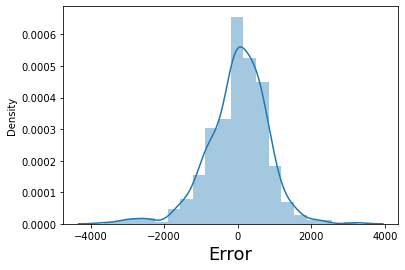

In [371]:
res = y_train - y_train_pred
sns.distplot(res,bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Error', fontsize=18)
plt.show()

# 7: Predictions and evaluations on test set

#### Applying the scaling on the test set

In [362]:
#Create a list of numeric variables
num_vars = ['atemp','hum','windspeed']

# fit on data
#fit(): learns xmin and xmax
#transforms():x-xmin/xmax-xmin
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,weathersit_Clear,weathersit_Light Rain,weathersit_Mist,...,season_spring,season_summer,season_winter,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed
184,0,1,0,0.769660,0.657364,0.084219,6043,0,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,6211,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,0,0,1,0.496145,0.837699,0.334206,2659,0,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.795343,0.437098,0.339570,4780,1,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.741471,0.314298,0.537414,4968,1,0,0,...,0,1,0,0,0,0,0,1,0,0


#### Dividing into X_test and y_test

In [363]:
y_test = df_test.pop('cnt')
X_test = df_test

In [364]:
# now let's use our model to make predictions

# Creating X_test_new dataframe by dropping variables from X_test

cols = ['yr','workingday','atemp','windspeed','weathersit_Light Rain','weathersit_Mist','mnth_sep','season_spring','weekday_Sat']
X_test_new = X_test[cols]

# adding a constant variable
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_test_pred = lm.predict(X_test_new)



## 7.1 Model Evaluation

Text(0, 0.5, 'y_test_pred')

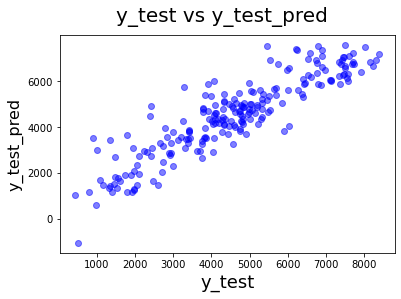

In [370]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_test_pred, c='blue', alpha = 0.5)
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_test_pred',fontsize=16)

#### We can see that variance of residuals is constant, error terms does not varry much

#### R-squared value for test data

In [366]:
r2_score(y_test,y_test_pred)

0.805804633046714

##### R2 value for test set is 0.80 is almost same as R2 value of train data 0.82 and difference is less than 5%

## Suggestion to increase the business

##### - Company can focus during summer and fall season by introducing new marketing schemes like promoting brand through youtube ads, instagrams, facebook etc
##### - In the other season when market is down, you can start introducing shelter bikes which you can drive in light rains or in emergencies. Company can introduce shelters just before rain starts and with offers so that demand dont decrease.
##### - when people book bike or registered themselves they can get special discounts, vouchers, scratch cards
##### - during sep demand is at peak, company can do promotion with above suggestion at this time

## Variables that help predict demand of bikes
- year 
- workingday 
- atemp 
- windspeed 
- weathersit_Light Rain
- weathersit_Mist
- mnth_sep
- season_spring
- weekday_Sat